In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "./movielens/movielens100k/"

In [3]:
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), index_col = 'userId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col = 'movieId', encoding='utf-8')

In [4]:
print(tags_df.shape)
print(ratings_df.shape)
print(movies_df.shape)

(1296, 4)
(100004, 3)
(9125, 2)


## Movie Genre

In [5]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [6]:
all_genres = [x.split('|') for x in movies_df['genres'].values]

In [7]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9125
20
['Comedy', 'Romance', '(no genres listed)', 'Horror', 'Musical', 'Documentary', 'IMAX', 'Sci-Fi', 'Mystery', 'Western', 'Children', 'Fantasy', 'Crime', 'Drama', 'Adventure', 'Film-Noir', 'Action', 'War', 'Animation', 'Thriller']


In [9]:
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Genre correlation

In [11]:
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.020071,-0.016604,-0.010090,-0.011615,-0.033582,-0.016460,-0.010647,-0.042573,-0.012353,-0.005407,-0.014497,-0.005806,-0.009444,-0.011183,-0.020071,-0.013706,-0.021496,-0.009101,-0.006089
Action,-0.020071,1.000000,0.305690,0.036982,-0.042670,-0.132622,0.146065,-0.102965,-0.159149,0.066010,-0.040277,-0.031219,0.150422,-0.087280,-0.024628,-0.132921,0.249004,0.209719,0.084570,0.025117
Adventure,-0.016604,0.305690,1.000000,0.245196,0.267470,-0.049215,-0.077687,-0.077637,-0.159520,0.259176,-0.039842,-0.087752,0.156951,-0.000378,-0.045890,-0.071435,0.185330,-0.021883,0.015444,0.033415
Animation,-0.010090,0.036982,0.245196,1.000000,0.453513,0.034427,-0.063755,-0.047630,-0.154318,0.220388,-0.019129,-0.060225,0.096903,0.126646,-0.029188,-0.053726,0.076111,-0.092892,-0.030954,-0.012198
Children,-0.011615,-0.042670,0.267470,0.453513,1.000000,0.082181,-0.081584,-0.058611,-0.156880,0.247064,-0.031773,-0.082148,0.067095,0.145126,-0.039196,-0.062982,-0.008915,-0.122884,-0.046637,-0.012445
Comedy,-0.033582,-0.132622,-0.049215,0.034427,0.082181,1.000000,-0.072512,-0.137647,-0.290454,0.007429,-0.084260,-0.136530,-0.056049,0.050295,-0.116801,0.158409,-0.114705,-0.266373,-0.102437,-0.030565
Crime,-0.016460,0.146065,-0.077687,-0.063755,-0.081584,-0.072512,1.000000,-0.078267,0.061185,-0.080689,0.157178,-0.067055,-0.019513,-0.062089,0.144467,-0.093557,-0.085447,0.274465,-0.058658,-0.023164
Documentary,-0.010647,-0.102965,-0.077637,-0.047630,-0.058611,-0.137647,-0.078267,1.000000,-0.206098,-0.062794,-0.029127,-0.068246,0.002639,0.013394,-0.058197,-0.108125,-0.070397,-0.114562,-0.009625,-0.032800
Drama,-0.042573,-0.159149,-0.159520,-0.154318,-0.156880,-0.290454,0.061185,-0.206098,1.000000,-0.120641,0.033643,-0.192422,-0.073793,-0.066349,0.027127,0.108185,-0.155738,-0.017958,0.119972,-0.034864
Fantasy,-0.012353,0.066010,0.259176,0.220388,0.247064,0.007429,-0.080689,-0.062794,-0.120641,1.000000,-0.030247,0.016064,0.112617,0.058028,0.016311,0.003702,0.050156,-0.051951,-0.041742,-0.028572


In [21]:

abs_corr_matrix = genres_df.corr().abs()

high_corr_pairs = abs_corr_matrix[(abs_corr_matrix >= 0.25) & (abs_corr_matrix < 1.0)]

high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs.columns = ['genre1', 'genre2', 'Correlation']

high_corr_pairs = high_corr_pairs[high_corr_pairs['genre1'] < high_corr_pairs['genre2']]

high_corr_pairs

,genre1,genre2,Correlation
0,Action,Adventure,0.305690
2,Adventure,Children,0.267470
3,Adventure,Fantasy,0.259176
4,Animation,Children,0.453513
7,Comedy,Drama,0.290454
8,Comedy,Thriller,0.266373
9,Crime,Thriller,0.274465
12,Mystery,Thriller,0.267281


<Axes: >

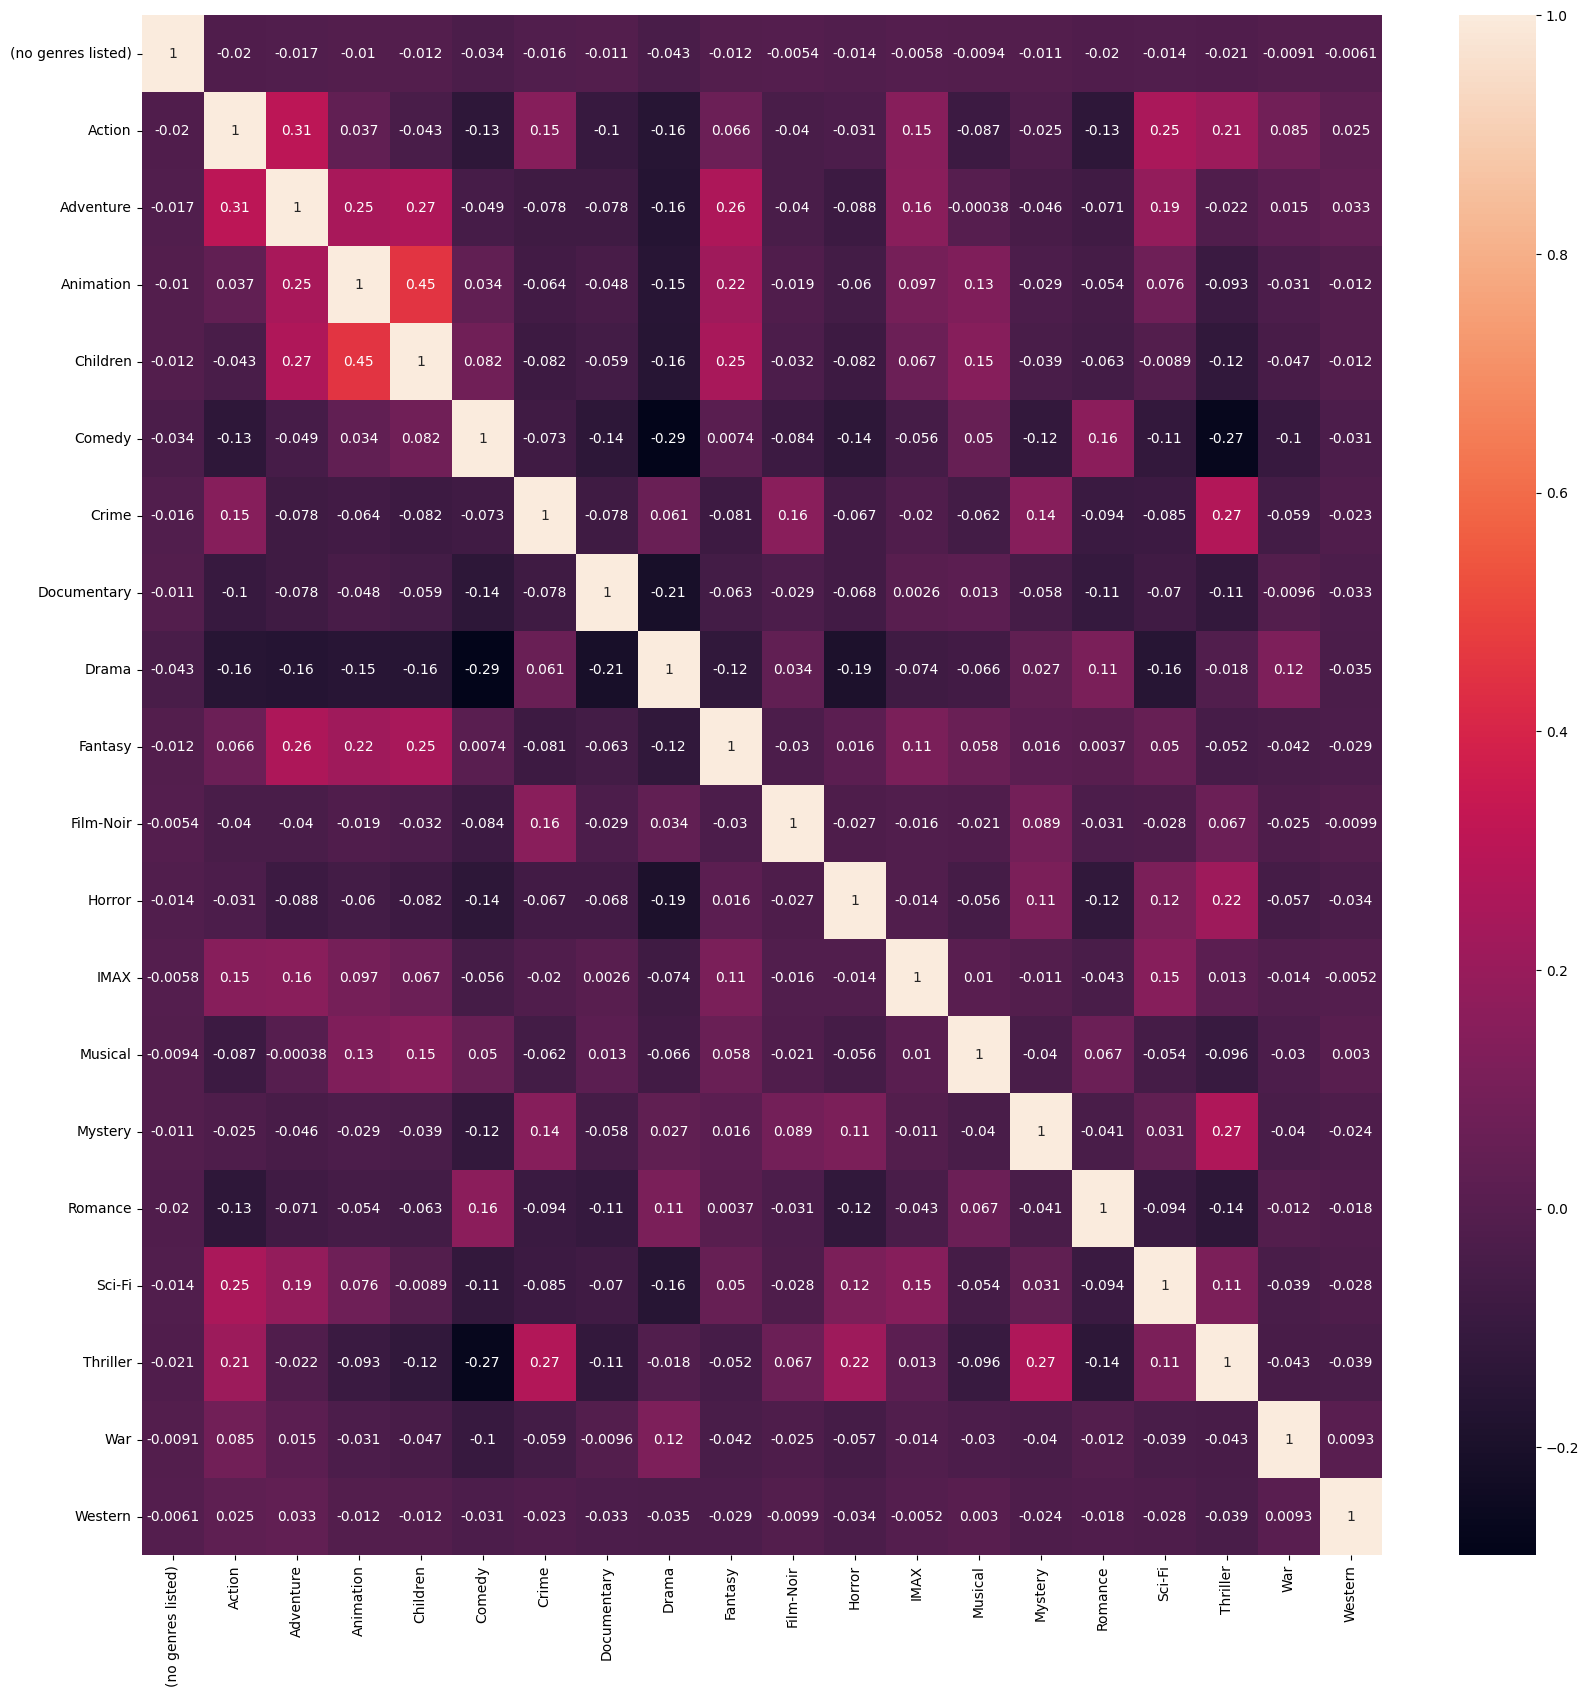

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(genres_df.corr(), annot=True)

### Movie's year & ratings

In [22]:
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
title_df = movies_df[['title', 'genres']]
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
title_df.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
3,Grumpier Old Men (1995),Comedy|Romance,(1995)
4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
5,Father of the Bride Part II (1995),Comedy,(1995)


In [42]:
title_df.isnull().sum()

title     0
genres    0
year      6
dtype: int64

In [43]:
title_df[title_df.genres=='(no genres listed)'].shape

(18, 3)

In [44]:
title_df.dropna(axis=0, inplace= True)
title_df['year'] = title_df['year'].apply(lambda x:x.replace('(', '').replace(')',''))
title_df.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


<Axes: xlabel='year'>

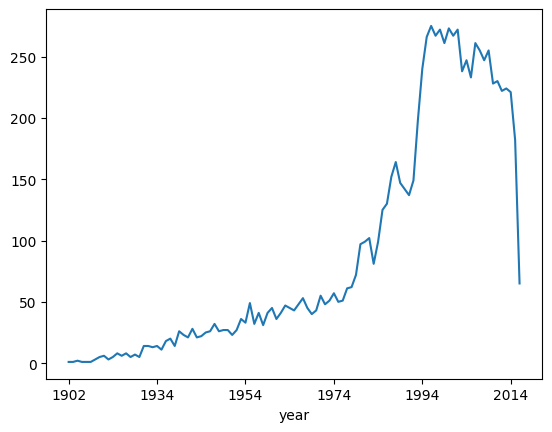

In [45]:
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df.plot()

<Axes: xlabel='year'>

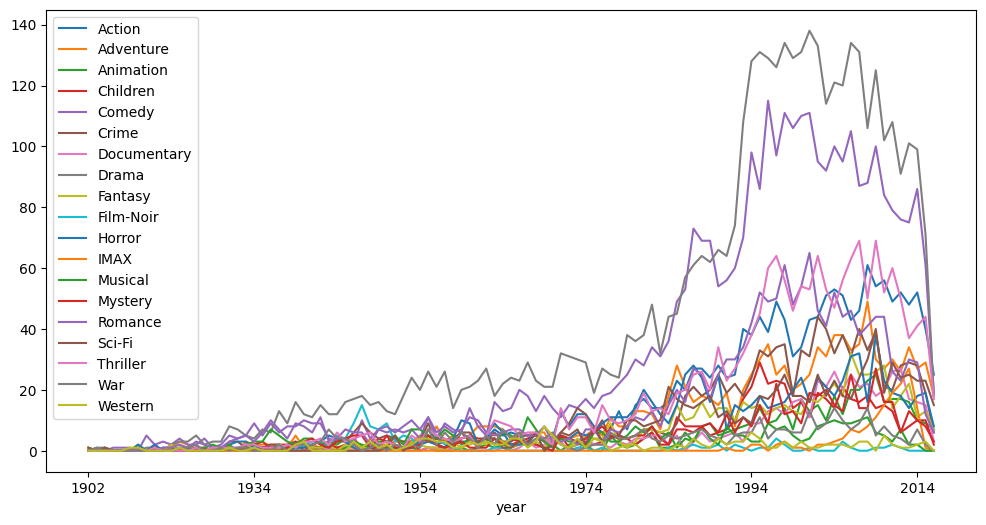

In [48]:
title_genre_df = pd.merge(title_df, genres_df, how='left', left_index=True, right_index=True)
title_genre_df.groupby('year')[title_genre_df.columns[4:]].sum().plot(figsize= (12,6))

In [49]:
ratings_df.head()

,movieId,rating,timestamp
userId,,,
1,31,2.5,1260759144
1,1029,3.0,1260759179
1,1061,3.0,1260759182
1,1129,2.0,1260759185
1,1172,4.0,1260759205


In [81]:
results = []
for genre in genres:
    for year in title_genre_df['year'].unique():
        avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(title_genre_df.loc[(title_genre_df['year'] == year)&(title_genre_df[genre]==1)].index)].mean()
        if avg_ratings == None:
            avg_ratings = np.nan
        results.append((year, genre, avg_ratings))


result_df = pd.DataFrame(results, columns=['year','genres','avg_ratings'])
result_df.sort_values(by=['year','genres'])
result_df.head()

,year,genres,avg_ratings
0,1995,Comedy,3.359239
1,1994,Comedy,3.466158
2,1996,Comedy,3.385918
3,1976,Comedy,3.700000
4,1992,Comedy,3.365440


In [82]:
result_df.tail()

,year,genres,avg_ratings
1952,2012,Thriller,3.235714
1953,2013,Thriller,3.150376
1954,2014,Thriller,3.477848
1955,2015,Thriller,3.194805
1956,2016,Thriller,3.189655


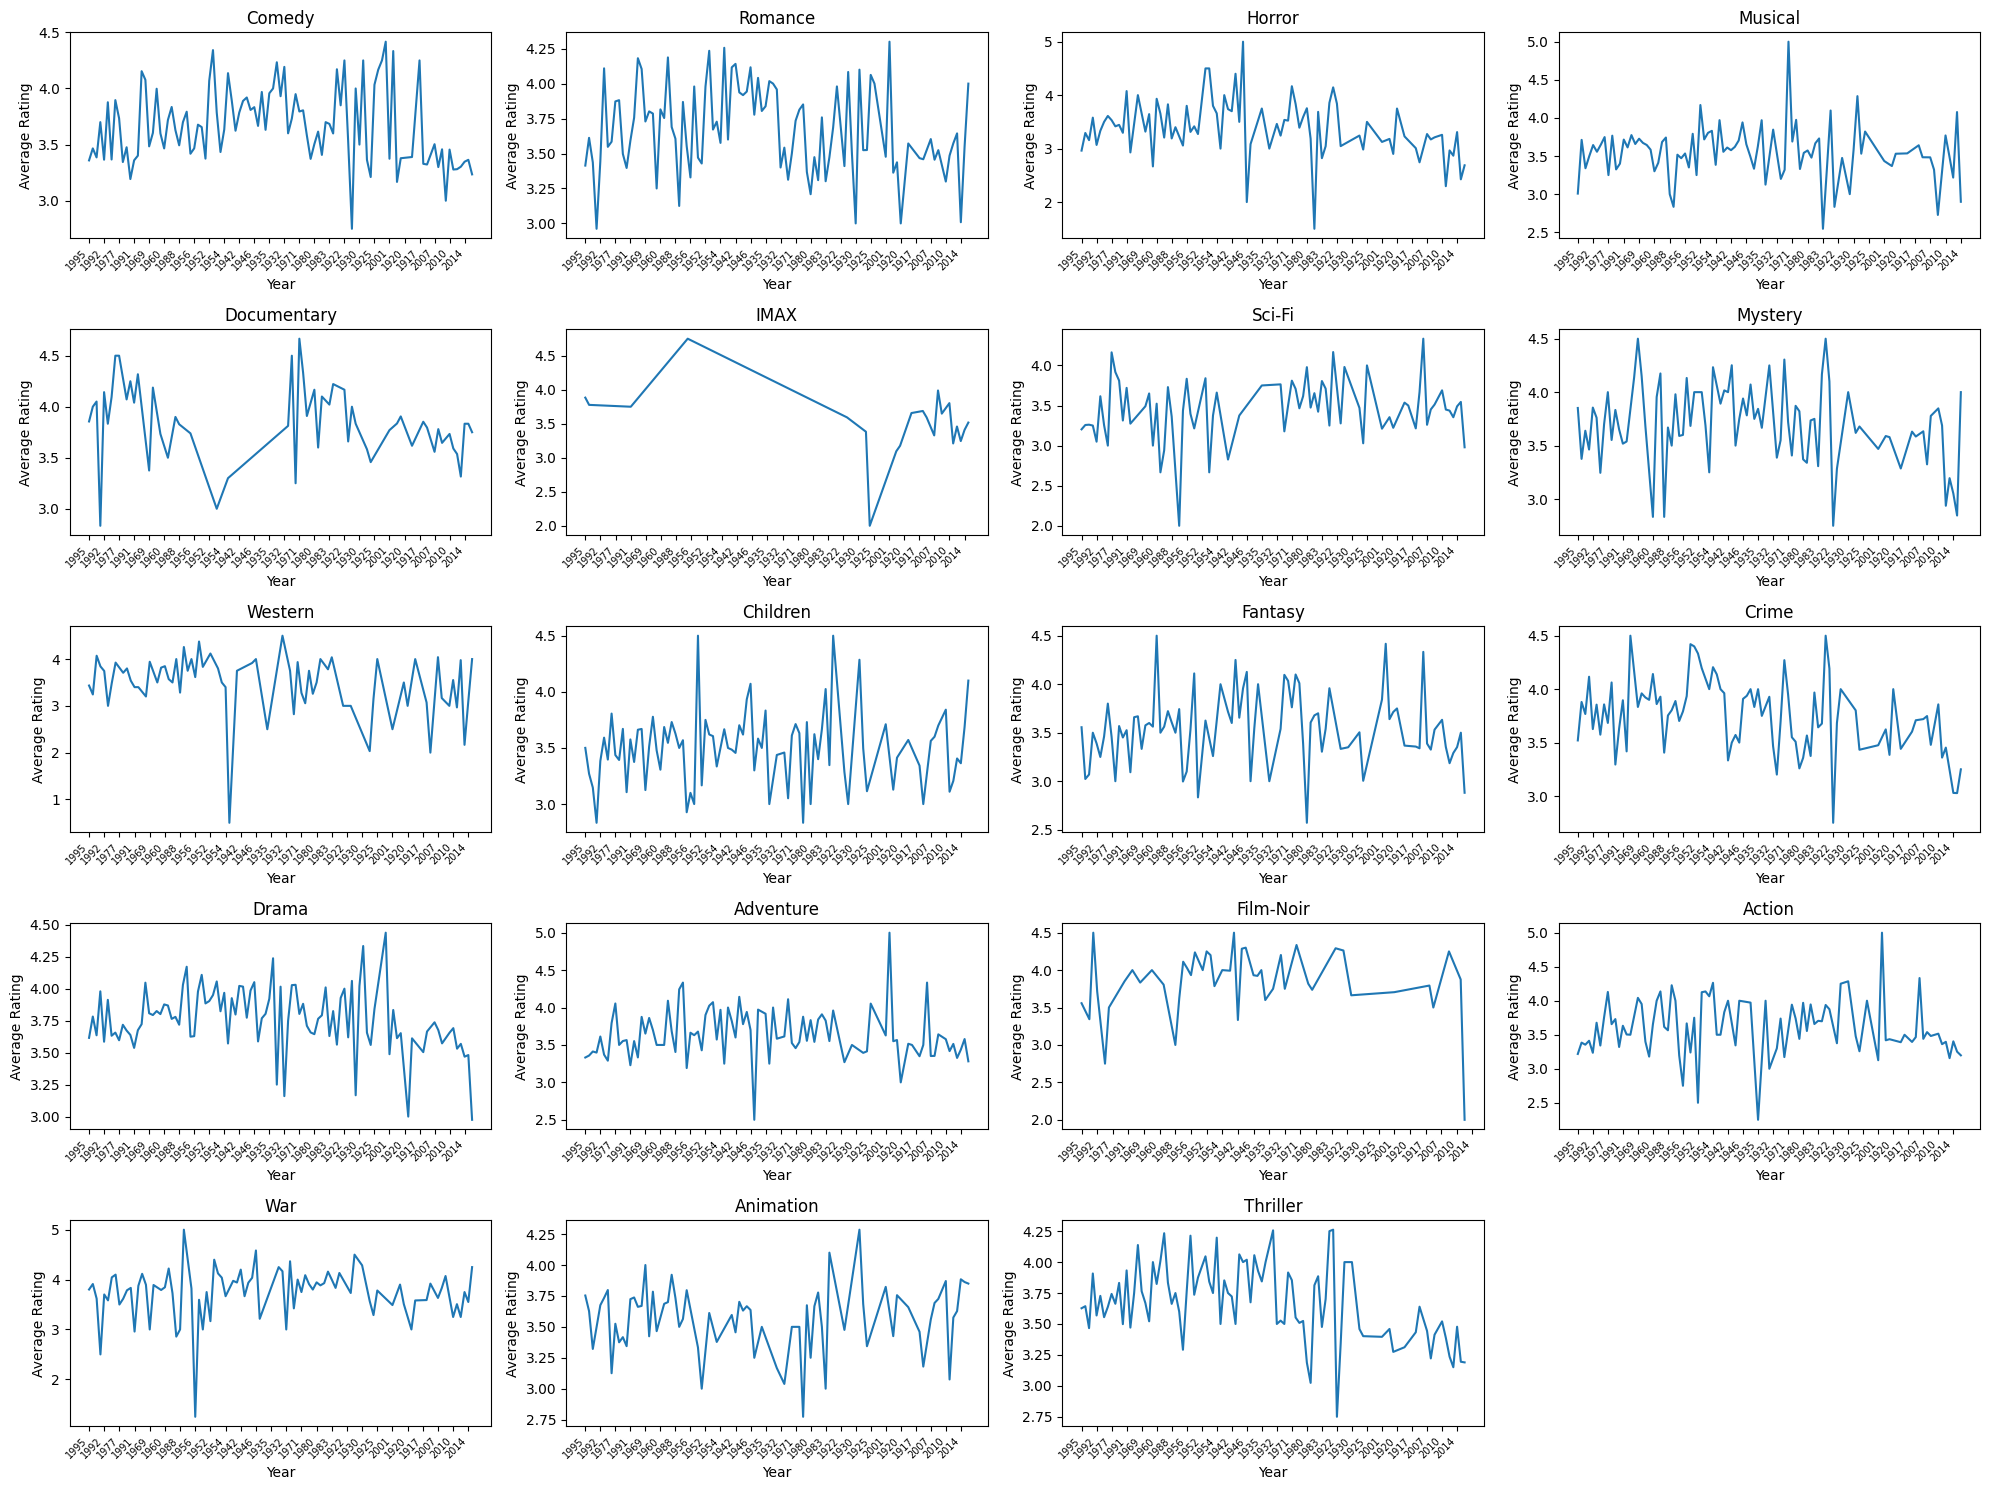

In [91]:
import math 
num_genres = len(genres)
cols = 4  
rows = math.ceil(num_genres / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten() 
for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = result_df[result_df['genres'] == genre]
    sns.lineplot(x='year', y='avg_ratings', data=genre_data, ax=ax)
    
    ax.set_title(genre)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Rating')
    ax.tick_params(axis='x', labelsize=7)     
    years = genre_data['year'].unique()
    ax.set_xticks(years[::4])
    ax.set_xticklabels(years[::4], rotation=45, ha='right')

for i in range(num_genres, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()